# **Detecting Outliers using DBSCAN**

Learning goals
- Compare DBSCAN and k-means clustering.
- Identify instances as core points, boundary points, and outliers.
- Use the DBSCAN algorithm to group instances into clusters and identify outliers.
- Implement the DBSCAN algorithm using scikit-learn.

#### **Outlier detection and density-based clustering**
k-means clustering is an algorithm that is easy to implement but sometimes fails when data is not spherical or contains a significant number of outliers. For situations like these, identifying the correct clusters can be accomplished by looking at regions with a large number of points. ***Density-based spatial clustering of applications with noise***, or ***DBSCAN***, is an algorithm that groups together points in high-density, connected regions.

#### **Advantages and disadvantages of DBSCAN**
**Advantages**
- Works well for data with outliers	
- Finds clusters with arbitrary shapes	
- Does not require a preset number of clusters	

**Disadvantages**
- Fails when regions have varying densities
- Is non-deterministic when grouping certain points
- Does not work well with high-dimensional data

#### **Introduction to DBSCAN**
DBSCAN identifies points according to a spherical region's density. The following terminology will be used in describing the DBSCAN algorithm:

- An ***epsilon neighborhood***, or ε-neighborhood, of a point is a spherical region of radius ε centered at that point.
- A ***core point*** is a point whose ε-neighborhood contains a given minimum number of points.
- A ***border point*** is a point that is not a core point but is contained in an ε-neighborhood of a core point.
- An ***outlier*** is a point that is neither a core point, nor a border point.

#### **DBSCAN algorithm**
The main idea behind the DBSCAN algorithm is that connected core points and corresponding boundary points form a single cluster. An instance that is neither a core point nor a boundary point will be classified as an outlier.

The DBSCAN algorithm requires two parameters:

epsilon or ε - the radius of the spherical region
min_samples - the minimum number of samples, or instances, for a point to be a core point

Given ε and min_samples, the following steps outline the DBSCAN algorithm:

- Step 1: Count the number of points within the ε-neighborhood of each instance and classify as core points instances whose ε-neighborhood has at least min_samples of points.

- Step 2: Identify the core points that are within the ε-neighborhood of other core points. These connected core points form a single cluster.

- Step 3: Assign points that are within the ε-neighborhood of a cluster to that cluster.

- Step 4: Assign points that are not within the ε-neighborhood of a cluster as outliers.

#### **Outliers in housing data**
In real estate, outliers represent a special circumstance that drastically affects the price of a house. One possibility is that a home received multiple offers and one bidder submitted a high offer to guarantee the offer is accepted. Another possibility is that an unexpected event happened and the owner needs to sell quickly.

The animation below uses a dataset that contains 76 single family homes with list price and square feet as features. The values for list price and square feet have been standardized, because the units and ranges of both variables are different.

#### **DBSCAN in Python**
The DBSCAN function performs the DBSCAN algorithm from a vector array or distance matrix. The required parameters are eps and min_samples. If these parameters are omitted, the default value for eps is 0.5 and the default value for min_samples is 5. The rest of the parameters and matching values can be found in the scikit-learn documentation.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

When the units and ranges of the features are different, standardizing the data is necessary. Data can be standardized using the StandardScaler library from the sklearn.preprocessing package.

The Python code below uses DBSCAN clustering to model homes based on sales price and square footage.



In [2]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from numpy import where
from sklearn.preprocessing import StandardScaler

import pandas as pd


import pandas as pd


# Data as a list of dictionaries (replace with your actual data)
data = [
    {'ID': 1, 'Price': 388.0, 'Floor': 2.180, 'Lot': 4, 'Bath': 3.0, 'Bed': 4, 'BathBed': 12.0, 'Year': 1940, 'Age': -3.0, 'AgeSq': 9.00, 'Gar': 0, 'Status': 'Sold', 'DAc': 0, 'School': 'Edison', 'DEd': 1, 'DHa': 0, 'DAd': 0, 'DCr': 0, 'DPa': 0},
    {'ID': 2, 'Price': 450.0, 'Floor': 2.054, 'Lot': 5, 'Bath': 3.0, 'Bed': 4, 'BathBed': 12.0, 'Year': 1957, 'Age': -1.3, 'AgeSq': 1.69, 'Gar': 2, 'Status': 'Sold', 'DAc': 0, 'School': 'Edison', 'DEd': 1, 'DHa': 0, 'DAd': 0, 'DCr': 0, 'DPa': 0},
    {'ID': 3, 'Price': 386.0, 'Floor': 2.112, 'Lot': 5, 'Bath': 2.0, 'Bed': 4, 'BathBed': 8.0, 'Year': 1955, 'Age': -1.5, 'AgeSq': 2.25, 'Gar': 2, 'Status': 'Sold', 'DAc': 0, 'School': 'Edison', 'DEd': 1, 'DHa': 0, 'DAd': 0, 'DCr': 0, 'DPa': 0},
    {'ID': 4, 'Price': 350.0, 'Floor': 1.442, 'Lot': 6, 'Bath': 1.0, 'Bed': 2, 'BathBed': 2.0, 'Year': 1956, 'Age': -1.4, 'AgeSq': 1.96, 'Gar': 1, 'Status': 'Active', 'DAc': 1, 'School': 'Adams', 'DEd': 0, 'DHa': 0, 'DAd': 1, 'DCr': 0, 'DPa': 0},
    {'ID': 5, 'Price': 155.5, 'Floor': 1.800, 'Lot': 1, 'Bath': 2.0, 'Bed': 4, 'BathBed': 8.0, 'Year': 1994, 'Age': 2.4, 'AgeSq': 5.76, 'Gar': 1, 'Status': 'Sold', 'DAc': 0, 'School': 'Adams', 'DEd': 0, 'DHa': 0, 'DAd': 1, 'DCr': 0, 'DPa': 0},
    {'ID': 6, 'Price': 220.0, 'Floor': 1.965, 'Lot': 5, 'Bath': 2.0, 'Bed': 3, 'BathBed': 6.0, 'Year': 1940, 'Age': -3.0, 'AgeSq': 9.00, 'Gar': 1, 'Status': 'Sold', 'DAc': 0, 'School': 'Adams', 'DEd': 0, 'DHa': 0, 'DAd': 1, 'DCr': 0, 'DPa': 0},
]

# Create DataFrame
homes = pd.DataFrame(data)

# Print DataFrame (optional)
homes


,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
5,6,220.0,1.965,5,2.0,3,6.0,1940,-3.0,9.00,1,Sold,0,Adams,0,0,1,0,0


In [3]:
# Create a smaller data frame with two variables: Price and Floor
homes_pf = homes[['Price', 'Floor']]
homes_pf.describe()

,Price,Floor
count,6.000000,6.000000
mean,324.916667,1.925500
std,112.867363,0.270979
min,155.500000,1.442000
25%,252.500000,1.841250
50%,368.000000,2.009500
75%,387.500000,2.097500
max,450.000000,2.180000


In [4]:
# Define a scaler to transform values
scaler = StandardScaler()

# Apply scaler and view result
homes_scaled = pd.DataFrame(scaler.fit_transform(homes_pf), columns=['Price', 'Floor'])
homes_scaled.describe()

,Price,Floor
count,6.000000e+00,6.000000e+00
mean,-2.220446e-16,-6.846375e-16
std,1.095445e+00,1.095445e+00
min,-1.644290e+00,-1.954573e+00
25%,-7.028470e-01,-3.405848e-01
50%,4.181495e-01,3.395742e-01
75%,6.074086e-01,6.953185e-01
max,1.214008e+00,1.028829e+00


In [5]:
# Initialize DBSCAN model
# Setting a large epsilon will cluster all "middle" values and detect outliers
dbscanModel = DBSCAN(eps=1, min_samples=12)

# Fit the model
dbscanModel = dbscanModel.fit(homes_scaled)

In [6]:
# Predict clusters
clusters = dbscanModel.fit_predict(homes_scaled)
clusters = pd.Categorical(clusters)
clusters

[-1, -1, -1, -1, -1, -1]
Categories (1, int64): [-1]

Text(0, 0.5, 'Scaled price')

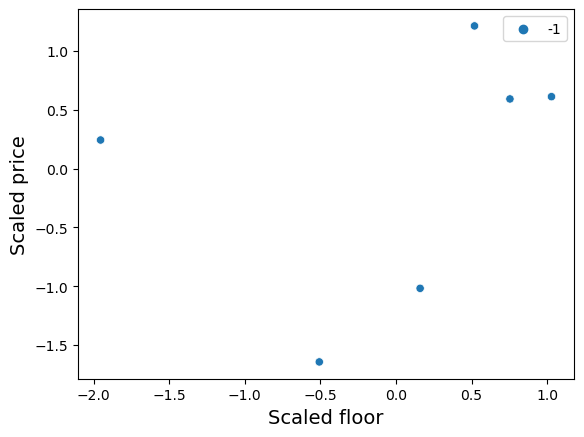

In [7]:
# Visualize scaled outliers
p = sns.scatterplot(data=homes_scaled, x='Floor', y='Price', hue=clusters)
p.set_xlabel('Scaled floor', fontsize=14)
p.set_ylabel('Scaled price', fontsize=14)

In [8]:
# Points where the prediction is -1 are considered outliers
outliers_scaled = homes_scaled[clusters == -1]
outliers_scaled

,Price,Floor
0,0.612261,1.028829
1,1.214008,0.519468
2,0.592850,0.753935
3,0.243449,-1.954573
4,-1.644290,-0.507340
5,-1.018279,0.159681


In [9]:
# Outliers on original scale (price and square footage in thousands)
outliers_unscaled = homes[clusters == -1]
outliers_unscaled

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
5,6,220.0,1.965,5,2.0,3,6.0,1940,-3.0,9.00,1,Sold,0,Adams,0,0,1,0,0


Text(0, 0.5, 'Price')

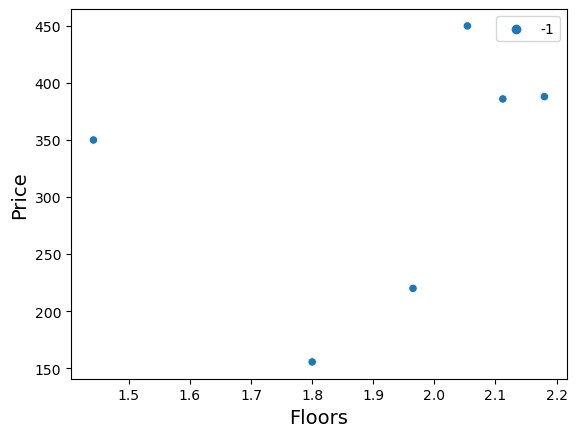

In [10]:
# Visualize outliers on original scale
p = sns.scatterplot(data=homes, x='Floor', y='Price', hue=clusters)
p.set_xlabel('Floors', fontsize=14)
p.set_ylabel('Price', fontsize=14)

#### **Variance and communality**
Since factor analysis models the relationships between features, the variance is analyzed instead of the mean. Variance can be partitioned into common variance and unique variance. ***Common variance*** is the amount of variance in a given feature explained by all of the factors. ***Communality***, or hsquared i, is the term used when the common variance is between 0 and 1 and is equal to the sum of the square factor loadings. ***Unique variance*** is the amount of variance that is not shared between a set of observed features and may come from measurement error or reasons specific to the feature.